### Question-26
### HandsOn - Predict The Data Scientists Salary In India from kaggle use sklearn
dataset: Predict-The-Data-Scientists-Salary-In-India_Train_Dataset.csv
Data Features:
    Name of the company (Encoded)
    Years of experience(split to min and max experience)
    Job description
    Job designation
    Job Type
    Key skills
    Location (needs LabelEncoded)
    Salary in Rupees Lakhs(To be predicted)(needs LabelEncoded)
    
Find the best estimator among below 
clf1 = DecisionTreeClassifier()
clf2 = RandomForestClassifier(n_estimators=100)
clf3 = ExtraTreesClassifier(n_estimators=100)
clf4 =  AdaBoostClassifier(n_estimators=100)
clf5 =  GradientBoostingClassifier(n_estimators=100)

In [239]:
from sklearn.pipeline import * 
from sklearn.naive_bayes import * 
from sklearn.cluster import *  
from sklearn.covariance import *  
from sklearn.cross_decomposition import *  
from sklearn.datasets import *  
from sklearn.decomposition import *  
from sklearn.ensemble import *  
from sklearn.feature_extraction import *  
from sklearn.feature_extraction.text import *  
from sklearn.feature_selection import *  
from sklearn.gaussian_process import *  
from sklearn.linear_model import *  
from sklearn.manifold import *  
from sklearn.metrics import *  
from sklearn.mixture import *  
from sklearn.model_selection import *  
from sklearn.neighbors import *  
from sklearn.neural_network import *  
from sklearn.preprocessing import *  
from sklearn_pandas import DataFrameMapper
from sklearn.svm import *  
from sklearn.tree import *
from yellowbrick.classifier import ConfusionMatrix, ROCAUC

In [175]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [176]:
import sklearn.datasets
print(dir(sklearn.datasets))

['__all__', '__builtins__', '__cached__', '__doc__', '__file__', '__getattr__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '_arff_parser', '_base', '_california_housing', '_covtype', '_kddcup99', '_lfw', '_olivetti_faces', '_openml', '_rcv1', '_samples_generator', '_species_distributions', '_svmlight_format_fast', '_svmlight_format_io', '_twenty_newsgroups', 'clear_data_home', 'dump_svmlight_file', 'fetch_20newsgroups', 'fetch_20newsgroups_vectorized', 'fetch_california_housing', 'fetch_covtype', 'fetch_file', 'fetch_kddcup99', 'fetch_lfw_pairs', 'fetch_lfw_people', 'fetch_olivetti_faces', 'fetch_openml', 'fetch_rcv1', 'fetch_species_distributions', 'get_data_home', 'load_breast_cancer', 'load_diabetes', 'load_digits', 'load_files', 'load_iris', 'load_linnerud', 'load_sample_image', 'load_sample_images', 'load_svmlight_file', 'load_svmlight_files', 'load_wine', 'make_biclusters', 'make_blobs', 'make_checkerboard', 'make_circles', 'make_classification', 'make_fried

In [177]:
path = r"C:\Users\Subash\handson\Day_10\code\data\Predict-The-Data-Scientists-Salary-In-India_Train_Dataset.csv"

In [178]:
data = pd.read_csv(path)

In [179]:
data.head()

,Unnamed: 0,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded
0,0,5-7 yrs,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,NaN,"team skills, communication skills, analytical ...",Delhi NCR(Vikas Puri),6to10,3687
1,1,10-17 yrs,He should have handled a team of atleast 5-6 d...,Head SCM,NaN,"ppc, logistics, inventory management, supply c...",Sonepat,10to15,458
2,2,5-9 yrs,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",Delhi NCR,15to25,4195
3,3,7-10 yrs,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",Bengaluru,10to15,313
4,4,1-3 yrs,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,NaN,"accounting, finance, cash flow, financial plan...",Gurgaon,3to6,1305


In [180]:
data = data.drop(columns = ['Unnamed: 0'])

In [181]:
data.columns

Index(['experience', 'job_description', 'job_desig', 'job_type', 'key_skills',
       'location', 'salary', 'company_name_encoded'],
      dtype='object')

In [182]:
data.dtypes

experience              object
job_description         object
job_desig               object
job_type                object
key_skills              object
location                object
salary                  object
company_name_encoded     int64
dtype: object

In [183]:
data.shape

(19802, 8)

In [184]:
data.size

158416

In [185]:
data.isnull().sum()

experience                  0
job_description          4418
job_desig                   0
job_type                15005
key_skills                  1
location                    0
salary                      0
company_name_encoded        0
dtype: int64

In [186]:
data['job_type'].value_counts()

job_type
Analytics    3747
analytics     921
ANALYTICS      77
analytic       32
Analytic       20
Name: count, dtype: int64

In [187]:
data['job_type'] = 'Analytics'
data['job_type'].value_counts()

job_type
Analytics    19802
Name: count, dtype: int64

In [188]:
data['key_skills'] = data['key_skills'].fillna(data['key_skills'].mode()[0])

In [189]:
data['job_description'].nunique(),data['job_description'].value_counts()

(9059,
 job_description
 Accenture Technology powers our clients businesses with innovative technologies established and emerging ...    144
 - Experience in Credit card/ banking domain with knowledge across customer lifecycle is must;- Candidate ...     46
 - Experience in defining and executing professional software engineering best practices for the full ...         33
 - Team management / mentor ship experience is must; Should be good at resolving conflicts;- Experience ...       32
 - An advanced degree in Math, Computer Science, Statistics, Physics, or a related field (high GPAs ...           29
                                                                                                                ... 
 Hands-on dashboard design on Power BI desktop, must have done report creation using virtualization on ...         1
 - Strong experience with messaging protocols like mqtt, rabbitmq;- 5+ Years Over all software ...                 1
 -\tPreparing full vehicle CAE models us

In [190]:
data.isnull().sum()

experience                 0
job_description         4418
job_desig                  0
job_type                   0
key_skills                 0
location                   0
salary                     0
company_name_encoded       0
dtype: int64

In [191]:
data['experience']
data['experience'] = data['experience'].str.replace(' yrs','')

In [192]:
data['experience'].loc[0:5]

0      5-7
1    10-17
2      5-9
3     7-10
4      1-3
5     5-10
Name: experience, dtype: object

In [193]:
data[['min_experience', 'max_experience']] = data['experience'].str.replace(' yrs', '').str.split('-', expand=True).astype(int)

In [194]:
data.columns

Index(['experience', 'job_description', 'job_desig', 'job_type', 'key_skills',
       'location', 'salary', 'company_name_encoded', 'min_experience',
       'max_experience'],
      dtype='object')

In [195]:
data['salary'].unique()

array(['6to10', '10to15', '15to25', '3to6', '25to50', '0to3'],
      dtype=object)

In [196]:
data['location'].unique()

array(['Delhi NCR(Vikas Puri)', 'Sonepat', 'Delhi NCR', ...,
       'Bengaluru, Mumbai, Gurgaon, Gurugram', 'Amravati',
       'Mumbai, Bengaluru, Chennai, Hyderabad, Dehradun, Gurgaon'],
      dtype=object)

In [197]:
#Preprocessing - LableEncoder
ln = LabelEncoder()
data['location'] = ln.fit_transform(data['location'])
data['salary'] = ln.fit_transform(data['salary'])
data.head()

,experience,job_description,job_desig,job_type,key_skills,location,salary,company_name_encoded,min_experience,max_experience
0,5-7,Exp: Minimum 5 years;Good understanding of IOC...,Senior Exploit and Vulnerability Researcher,Analytics,"team skills, communication skills, analytical ...",597,5,3687,5,7
1,10-17,He should have handled a team of atleast 5-6 d...,Head SCM,Analytics,"ppc, logistics, inventory management, supply c...",1412,1,458,10,17
2,5-9,Must be an effective communicator (written & s...,Deputy Manager - Talent Management & Leadershi...,Analytics,"HR Analytics, Employee Engagement, Training, S...",525,2,4195,5,9
3,7-10,7 - 10 years of overall experience in data e...,Associate Manager Data Engineering,Analytics,"SQL, Javascript, Automation, Python, Ruby, Ana...",114,1,313,7,10
4,1-3,Chartered Accountancy degree or MBA in Finance...,TS- GSA- Senior Analyst,Analytics,"accounting, finance, cash flow, financial plan...",811,4,1305,1,3


In [198]:
data['salary'].unique(),data['location'].unique()

(array([5, 1, 2, 4, 3, 0]), array([ 597, 1412,  525, ...,  324,   65, 1117]))

In [199]:
data[['job_description','key_skills']].nunique()

job_description     9059
key_skills         12951
dtype: int64

In [200]:
# The Key skills column has too many comma-separated skills like 72 in the first row, so one-hot encoding would create too many columns.
len(data['key_skills'][0]),type(data['key_skills'][0])

(72, str)

In [201]:
# The job_description column also has too many semicolan-separated things like 92 in the first row, so one-hot encoding would create too many columns.
#And the job_description has 9059 different descriptions
len(data['job_description'][0]),type(data['job_description'][0])

(96, str)

In [202]:
data.columns

Index(['experience', 'job_description', 'job_desig', 'job_type', 'key_skills',
       'location', 'salary', 'company_name_encoded', 'min_experience',
       'max_experience'],
      dtype='object')

In [203]:
# Not Loading Heavily texted/unstructured columns as a features into X
X_raw = data.loc[:,['company_name_encoded','job_desig','job_type','min_experience','max_experience','location']]
y = data['salary']
X_raw.head()


,company_name_encoded,job_desig,job_type,min_experience,max_experience,location
0,3687,Senior Exploit and Vulnerability Researcher,Analytics,5,7,597
1,458,Head SCM,Analytics,10,17,1412
2,4195,Deputy Manager - Talent Management & Leadershi...,Analytics,5,9,525
3,313,Associate Manager Data Engineering,Analytics,7,10,114
4,1305,TS- GSA- Senior Analyst,Analytics,1,3,811


In [204]:
data['job_desig'].nunique()
data['job_desig'].value_counts().count()   #11708 --if we do onehotencoding 11708 new columns for each will be formed it will too tough to handle those many dimensions
data['job_desig'].value_counts()[data['job_desig'].value_counts() > 1].count() #4386
data['job_desig'].value_counts()[data['job_desig'].value_counts() > 3].count() #590
data['job_desig'].value_counts()[data['job_desig'].value_counts() >= 5].count() #364 
common_jobs = X_raw['job_desig'].value_counts()[X_raw['job_desig'].value_counts() >= 5].index
X_raw['job_desig'] = X_raw['job_desig'].apply(lambda x: x if x in common_jobs else 'Other')

In [136]:
X_raw.columns

Index(['company_name_encoded', 'min_experience', 'max_experience', 'location',
       'job_desig_ACN - Digital - Analytics Operations Analytics',
       'job_desig_AGM / DGM - Analytics Lead - Marketing Function',
       'job_desig_AIM SBS APAC',
       'job_desig_AVP - Analytics - Credit Card - Tableau+python+r+sql',
       'job_desig_AVP - Business Analysis/project Management & Business Transformation',
       'job_desig_AVP - Ifrs9 - Wholesale Impairments Analytics Team',
       ...
       'job_desig_Trading Head - Market Making/high Frequency Trading - Iit/nit/bits',
       'job_desig_Turtlemint - Analyst/ Senior Analyst - Analytics',
       'job_desig_Urgent Requirement For Credit Manager - Vehicle',
       'job_desig_VP - Engineering - Product Startup - IIT/ NIT',
       'job_desig_VP - Engineering/ CTO - Ecommerce Startup - IIT/ NIT/ BITS',
       'job_desig_Vice President - Analytics - Bank',
       'job_desig_Vice President - Compensation & Benefits - Bfsi/it/fmcg',
       'jo

In [205]:
X_raw.head()

,company_name_encoded,job_desig,job_type,min_experience,max_experience,location
0,3687,Other,Analytics,5,7,597
1,458,Other,Analytics,10,17,1412
2,4195,Other,Analytics,5,9,525
3,313,Other,Analytics,7,10,114
4,1305,Other,Analytics,1,3,811


In [206]:
X_raw['job_desig'].nunique()

365

In [207]:
#Preprocessing - OneHotEncoding for the job_desig and job_type columns,by dropping originals, and add encoded columns to X_raw

oe = OneHotEncoder(sparse_output=False, drop='first')
job_encoded = oe.fit_transform(X_raw[['job_desig', 'job_type']])
encoded_df = pd.DataFrame(job_encoded, columns=oe.get_feature_names_out(['job_desig', 'job_type']))
encoded_df.index = X_raw.index
X_raw = pd.concat([X_raw.drop(columns=['job_desig', 'job_type']), encoded_df], axis=1)

In [208]:
scaler = StandardScaler()
X_raw[['min_experience', 'max_experience']] = scaler.fit_transform(X_raw[['min_experience', 'max_experience']])

In [211]:
#train-test-split
X_train, X_test, y_train, y_test = train_test_split(X_raw, y, test_size=0.1,random_state = 0)

## Models

### DecisionTreeClassifier

In [213]:
clf1 = DecisionTreeClassifier()

In [214]:
clf1.fit(X_train,y_train)

DecisionTreeClassifier()

In [215]:
clf1.score(X_train,y_train)

0.7988328376634308

In [216]:
clf1.score(X_test,y_test)

0.3467945482079758

In [236]:
y_train_pred = clf1.predict(X_train)
confusion_matrix(y_train,y_train_pred)

array([[2870,    0,    0,    0,   53,    5],
       [   6, 3899,  119,    1,   10,   43],
       [   3,  893, 2704,   73,    6,    9],
       [   0,    9,  391, 1025,    0,    0],
       [ 427,   60,   20,    1, 1924,  113],
       [ 100,  536,  266,   13,  428, 1814]], dtype=int64)

In [237]:
y_test_pred = clf1.predict(X_test)
confusion_matrix(y_test,y_test_pred)

array([[175,  24,  12,   1,  74,  31],
       [ 17, 170, 124,  12,  29,  70],
       [  6, 178, 130,  68,  17,  38],
       [  3,  12,  73,  60,   1,   1],
       [ 82,  29,  12,   2,  81,  73],
       [ 35, 123,  57,   6,  84,  71]], dtype=int64)

In [243]:
classes = ['6to10', '10to15', '15to25', '3to6', '25to50', '0to3']

C:\Users\Subash\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


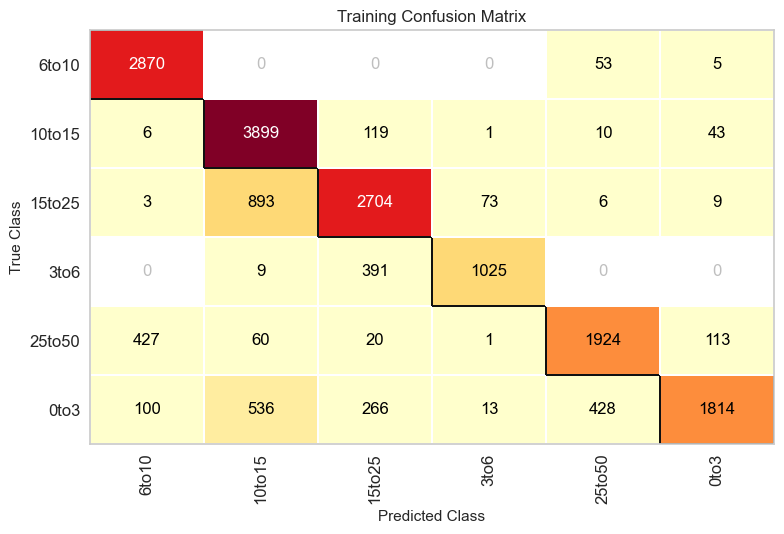

<Axes: title={'center': 'Training Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [244]:
cm = ConfusionMatrix(clf1,classes=classes,title='Training Confusion Matrix')
cm.score(X_train,y_train)
cm.show()

C:\Users\Subash\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


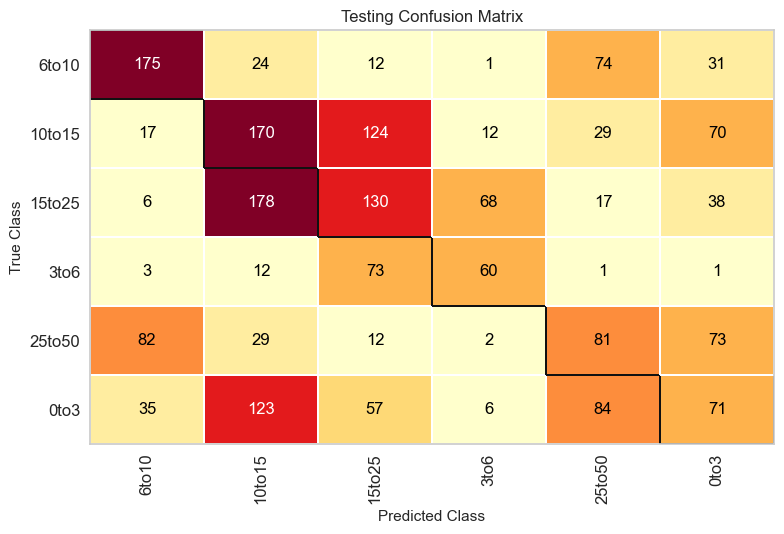

<Axes: title={'center': 'Testing Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [250]:
cm = ConfusionMatrix(clf1,classes=classes,title='Testing Confusion Matrix')
cm.score(X_test,y_test)
cm.show()

### RandomForestClassifier

In [218]:
clf2 = RandomForestClassifier(n_estimators=100,random_state=0)

In [219]:
clf2.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [220]:
clf2.score(X_train,y_train)

0.7988328376634308

In [221]:
clf2.score(X_test,y_test)

0.33669863705199393

In [222]:
y_train_pred = clf2.predict(X_train)
confusion_matrix(y_train,y_train_pred)

array([[2656,    1,    1,    0,  228,   42],
       [   3, 3295,  521,    2,   26,  231],
       [   1,  487, 2890,  203,   13,   94],
       [   0,    4,  265, 1153,    0,    3],
       [ 251,   37,   15,    1, 1944,  297],
       [  60,  337,  195,   12,  255, 2298]], dtype=int64)

C:\Users\Subash\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


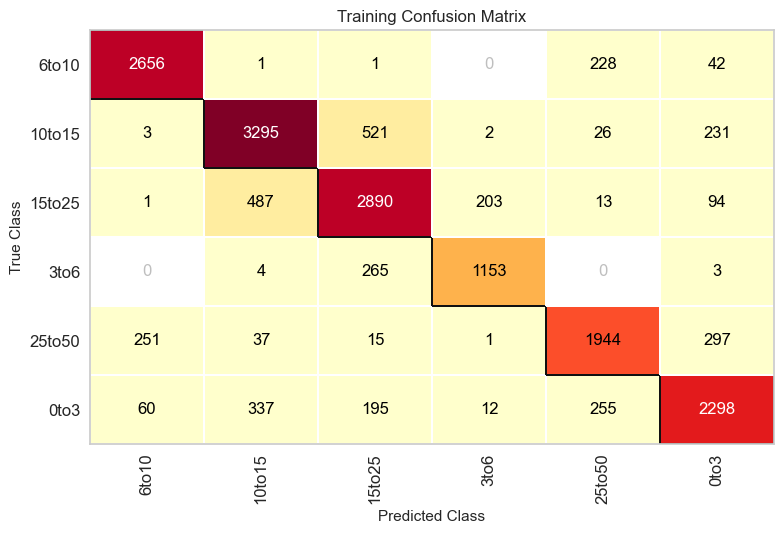

<Axes: title={'center': 'Training Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [246]:
cm = ConfusionMatrix(clf2,classes=classes,title='Training Confusion Matrix')
cm.score(X_train,y_train)
cm.show()

In [247]:
y_test_pred = clf2.predict(X_test)
confusion_matrix(y_test,y_test_pred)

array([[176,  20,   6,   1,  75,  39],
       [ 18, 124, 147,  14,  26,  93],
       [  7, 156, 152,  63,  11,  48],
       [  1,   7,  73,  67,   1,   1],
       [ 79,  32,   9,   1,  79,  79],
       [ 35, 130,  52,   9,  81,  69]], dtype=int64)

C:\Users\Subash\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


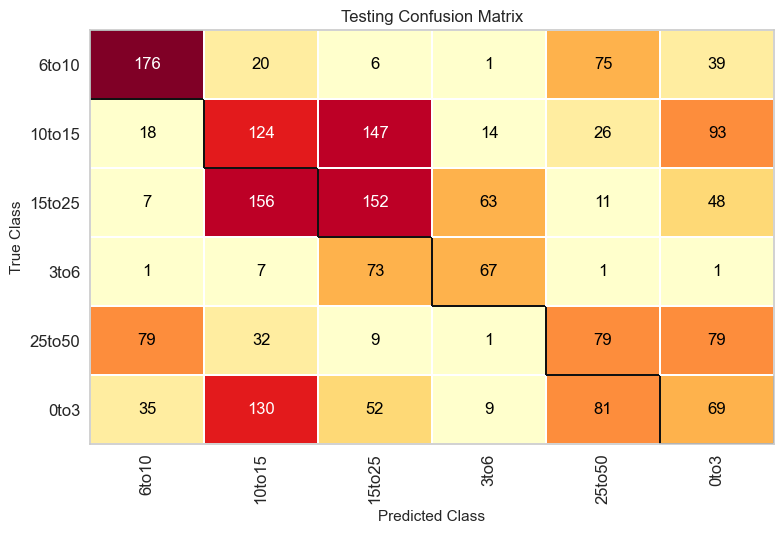

<Axes: title={'center': 'Testing Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [249]:
cm = ConfusionMatrix(clf2,classes=classes,title='Testing Confusion Matrix')
cm.score(X_test,y_test)
cm.show()

### ExtraTreeClassifier

In [223]:
clf3 = ExtraTreesClassifier(n_estimators=100)

In [224]:
clf3.fit(X_train,y_train)

ExtraTreesClassifier()

In [225]:
clf3.score(X_train,y_train)

0.7988328376634308

In [226]:
clf3.score(X_test,y_test)

0.3442705704189803

In [251]:
y_train_pred = clf3.predict(X_train)
confusion_matrix(y_train,y_train_pred)

array([[2870,    0,    0,    0,   53,    5],
       [   6, 3899,  119,    1,   10,   43],
       [   3,  893, 2704,   73,    6,    9],
       [   0,    9,  391, 1025,    0,    0],
       [ 427,   60,   20,    1, 1924,  113],
       [ 100,  536,  266,   13,  428, 1814]], dtype=int64)

C:\Users\Subash\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


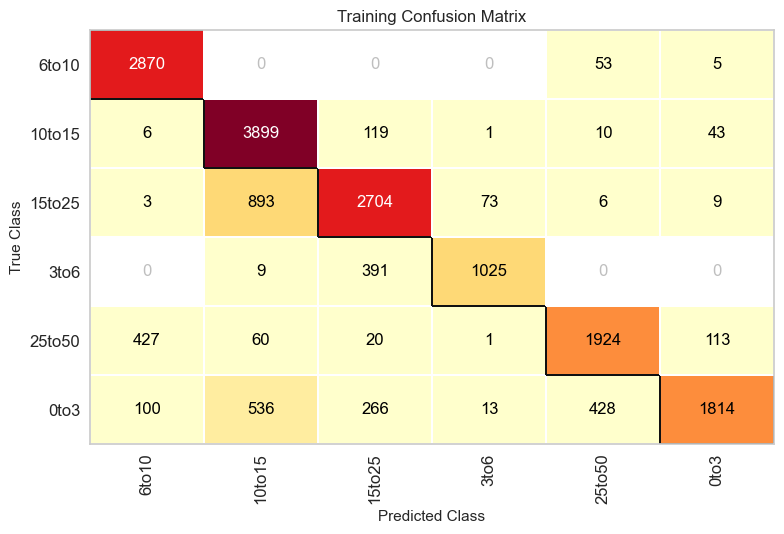

<Axes: title={'center': 'Training Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [257]:
cm = ConfusionMatrix(clf3,classes=classes,title='Training Confusion Matrix')
cm.score(X_train,y_train)
cm.show()

In [254]:
y_test_pred = clf3.predict(X_test)
confusion_matrix(y_test,y_test_pred)

array([[187,  19,   6,   1,  65,  39],
       [ 20, 138, 143,  12,  26,  83],
       [  6, 173, 145,  62,  14,  37],
       [  1,   7,  71,  68,   2,   1],
       [ 85,  29,   9,   1,  81,  74],
       [ 36, 129,  55,  10,  83,  63]], dtype=int64)

C:\Users\Subash\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


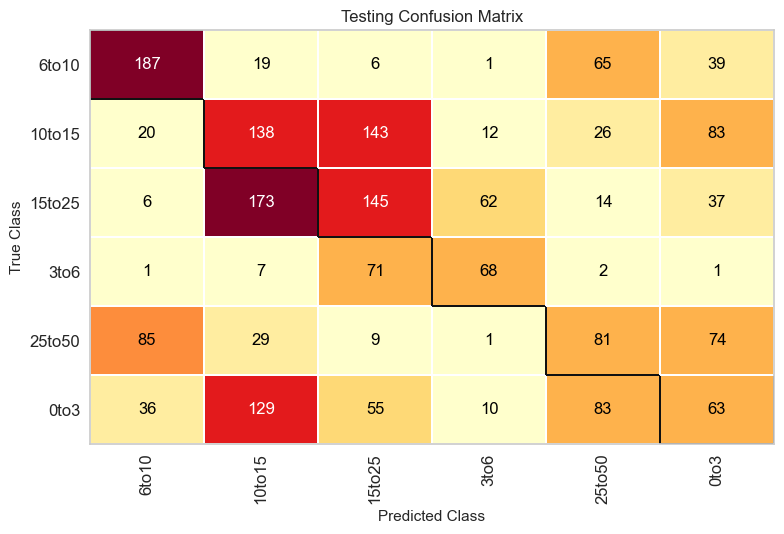

<Axes: title={'center': 'Testing Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [260]:
cm = ConfusionMatrix(clf3,classes=classes,title='Testing Confusion Matrix')
cm.score(X_test,y_test)
cm.show()

### AdaBoostClassifier

In [227]:
clf4 =  AdaBoostClassifier(n_estimators=100)

In [228]:
clf4.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=100)

In [229]:
clf4.score(X_train,y_train)

0.38202121093092417

In [230]:
clf4.score(X_test,y_test)

0.3897021706208985

In [252]:
y_train_pred = clf4.predict(X_train)
confusion_matrix(y_train,y_train_pred)

array([[2066,  363,   37,    1,  305,  156],
       [ 280, 1726,  852,   68,  347,  805],
       [ 107, 1406, 1413,  206,   98,  458],
       [  14,  290,  854,  195,   14,   58],
       [ 960,  525,   60,    2,  367,  631],
       [ 470,  952,  255,   18,  421, 1041]], dtype=int64)

C:\Users\Subash\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


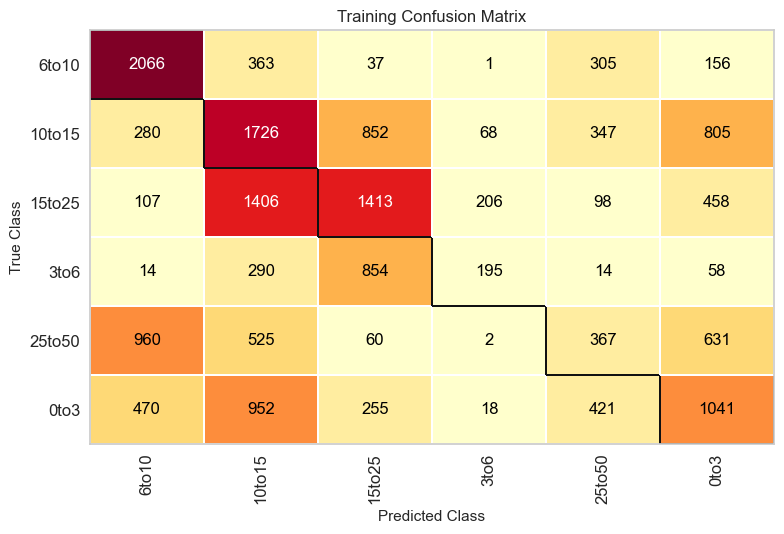

<Axes: title={'center': 'Training Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [258]:
cm = ConfusionMatrix(clf4,classes=classes,title='Training Confusion Matrix')
cm.score(X_train,y_train)
cm.show()

In [255]:
y_test_pred = clf4.predict(X_test)
confusion_matrix(y_test,y_test_pred)

array([[220,  39,   5,   0,  38,  15],
       [ 28, 177,  84,   7,  32,  94],
       [ 19, 165, 172,  20,  13,  48],
       [  2,  31,  84,  28,   1,   4],
       [ 89,  60,  12,   0,  45,  73],
       [ 43, 105,  30,   1,  67, 130]], dtype=int64)

C:\Users\Subash\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


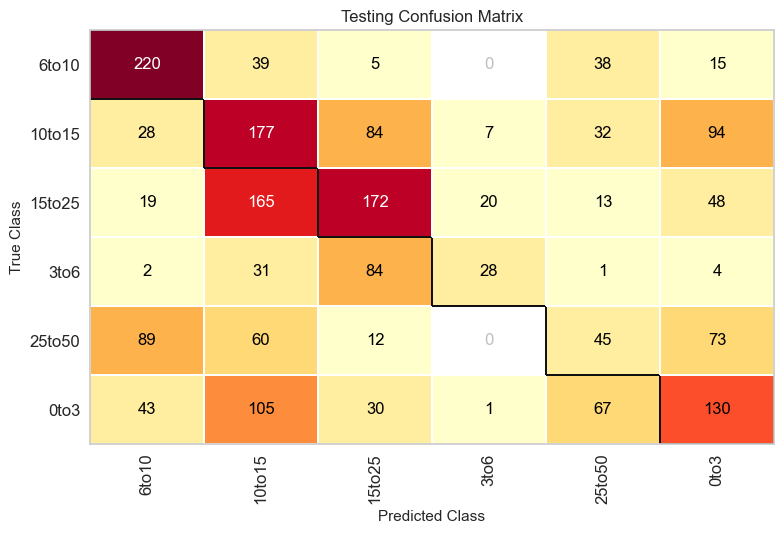

<Axes: title={'center': 'Testing Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [261]:
cm = ConfusionMatrix(clf4,classes=classes,title='Testing Confusion Matrix')
cm.score(X_test,y_test)
cm.show()

### GradientBoostingClassifier

In [231]:
clf5 =  GradientBoostingClassifier(n_estimators=100)

In [232]:
clf5.fit(X_train,y_train) 

GradientBoostingClassifier()

In [233]:
clf5.score(X_train,y_train)

0.47157847483306214

In [234]:
clf5.score(X_test,y_test)

0.4396769308430086

In [253]:
y_train_pred = clf5.predict(X_train)
confusion_matrix(y_train,y_train_pred)

array([[2245,  266,   53,    6,  172,  186],
       [ 316, 2193,  956,  106,  110,  397],
       [ 115, 1348, 1765,  264,   45,  151],
       [  21,  179,  531,  666,    9,   19],
       [ 842,  557,   81,    4,  592,  469],
       [ 429, 1170,  347,   29,  239,  943]], dtype=int64)

C:\Users\Subash\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


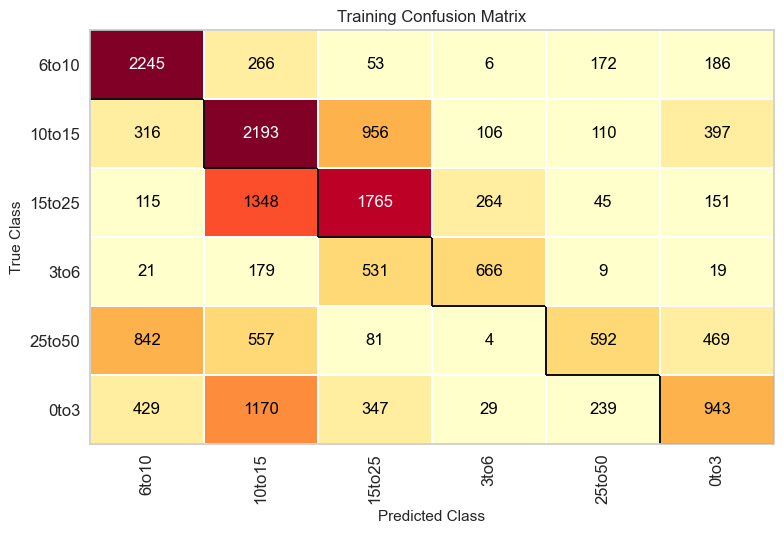

<Axes: title={'center': 'Training Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [259]:
cm = ConfusionMatrix(clf5,classes=classes,title='Training Confusion Matrix')
cm.score(X_train,y_train)
cm.show()

In [256]:
y_test_pred = clf5.predict(X_test)
confusion_matrix(y_test,y_test_pred)

array([[234,  28,   7,   1,  19,  28],
       [ 36, 234,  89,  16,  10,  37],
       [ 20, 161, 189,  46,   4,  17],
       [  4,  21,  47,  76,   1,   1],
       [ 86,  68,  12,   1,  48,  64],
       [ 48, 155,  38,   7,  38,  90]], dtype=int64)

C:\Users\Subash\AppData\Local\Programs\Python\Python312\Lib\site-packages\yellowbrick\classifier\base.py:232: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  warnings.warn(


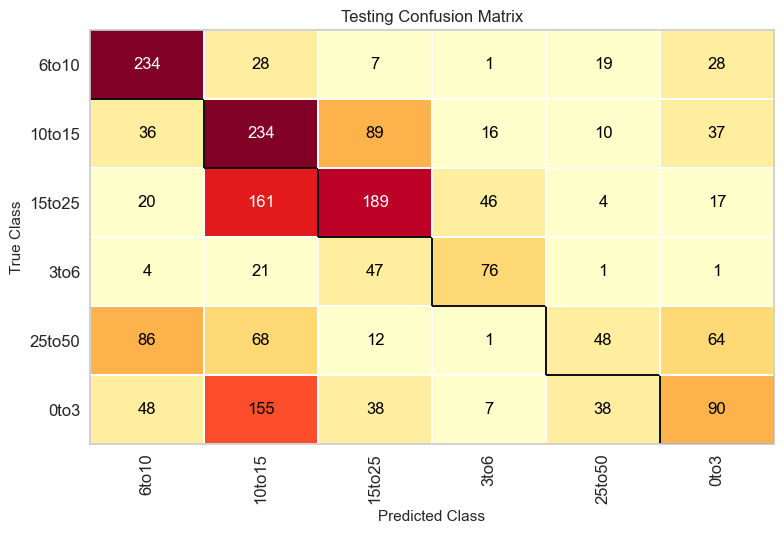

<Axes: title={'center': 'Testing Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [262]:
cm = ConfusionMatrix(clf5,classes=classes,title='Testing Confusion Matrix')
cm.score(X_test,y_test)
cm.show()

## Accuracy

In [270]:
models = {'DecisionTree':clf1,
          'RandomForest':clf2,
          'ExtraTree':clf3,
          'AdaBoost':clf4,
          'GradientBoost':clf5}
from sklearn.metrics import accuracy_score

for model_name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    train_acc = accuracy_score(y_train, y_train_pred)
    test_acc = accuracy_score(y_test, y_test_pred)
    
    print(f"Model: {model_name:} -----> Train Accuracy: {train_acc:.4f}  |  Test Accuracy: {test_acc:.4f}")


Model: DecisionTree -----> Train Accuracy: 0.7988  |  Test Accuracy: 0.3468
Model: RandomForest -----> Train Accuracy: 0.7988  |  Test Accuracy: 0.3367
Model: ExtraTree -----> Train Accuracy: 0.7988  |  Test Accuracy: 0.3443
Model: AdaBoost -----> Train Accuracy: 0.3820  |  Test Accuracy: 0.3897
Model: GradientBoost -----> Train Accuracy: 0.4716  |  Test Accuracy: 0.4397


### Best Model among all
GradientBoost is the best model based on test accuracy (0.4397).  
It generalizes better than others, which are likely overfitting.  
Even with lower training accuracy, it performs best on unseen data.